In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_file(file_path):
    data = np.empty((0, 3), float)   # To save the data that has been extracted out
        
    # Open the file in read mode
    with open(file_path, 'r') as file: # With statement: it will automatically closing the file after the block code is executed
        # Read the first line only
        headers = file.readline().strip().split(',')
            
        # Read each line of the CSV
        for line in file:
            values = np.array(line.strip().split(','), dtype=float)    # Split the line by commas and remove extra spaces
            data = np.append(data, [values], axis=0)    #[values] to ensure that it is treated as a 2D array (one row)

    return data

In [3]:
data = read_file("cdata.csv")
#print(data[ : 3][:])

QUESTION 1

In [4]:
# Kmeans algo. function
def Kmeans_algo(K, data, draw_round):
    # Set a counter for counting the round
    count = 0

    ### Find the RANGE of X, Y first, in order to have the range for randomizing the initial centroid
    x = data[ : , 0]
    y = data[ : , 1]
    # Find the range
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    # Randomly select K points within the range of x, y
    # Selecting random floating-point numbers uniformly within the range
    centroids_X = np.random.uniform(x_min, x_max, K)
    centroids_Y = np.random.uniform(y_min, y_max, K)
    centroids = np.stack((centroids_X, centroids_Y), axis=1)    # same as np.hstack
    #print(f"Centroid are {centroids}")

    #### ALGO iteration
    # Use to store the previous centroids for condition checking
    # Creates a new array of the same shape and type as the input array, but filled wwith zeros
    prev_centroids = np.zeros_like(centroids)
    # Iteration # The loop stops when the centroids are the same as the previous one
    while not np.array_equal(centroids, prev_centroids):
        prev_centroids = np.copy(centroids)

         # Step 1: Assign each data point to the nearest centroid
        clusters = []
        for point in data:
            distances = np.linalg.norm(point[ : 2] - centroids, axis=1)  # Calculate distance to each centroid
            cluster_index = np.argmin(distances)  # Assign to the closest centroid
            clusters.append(cluster_index)

        # Step 2: Update centroid positions and assign the point to the closest centroid
        clusters = np.array(clusters)
        for i in range(K):
            # Get all points assigned to the ith centroid
            points_in_cluster = data[clusters == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster[ : , : 2], axis=0)  # Update centroid

        # Step 3: Plot the round
        count += 1
        if draw_round == True:
            plot_iteration(data, centroids, clusters, K,  count)

    return centroids, clusters


# Plot the clusters and centroids
def plot_iteration(data, centroids, clusters, K, count):
    colors = ['r', 'g', 'b', 'orange']  # Use different colors for different clusters
    labels = ['A', 'B', 'C', 'D']  # Labels name
    plt.figure()
    
    # Plot each cluster with its assigned color
    for i in range(K):
        points_in_cluster = data[clusters == i]
        plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], c=colors[i], label=labels[i])
    
    # Plot the centroids 
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker='x', s=100, label="Central")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Round {count}")
    plt.legend(loc="upper right")
    plt.show()





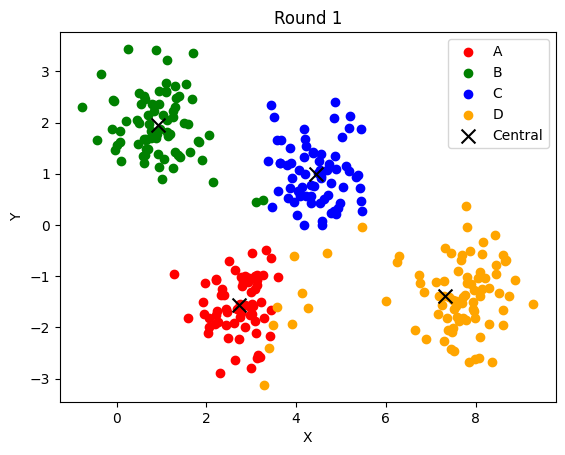

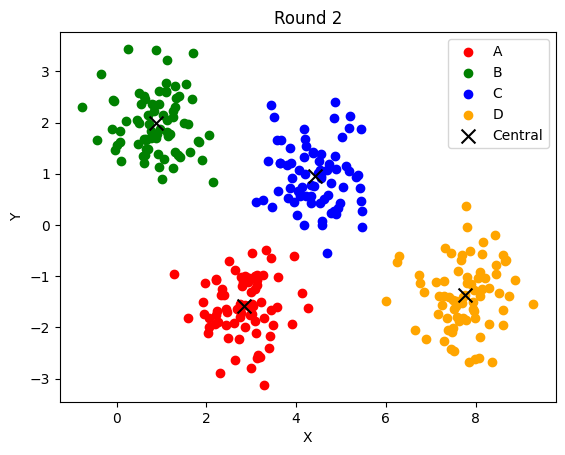

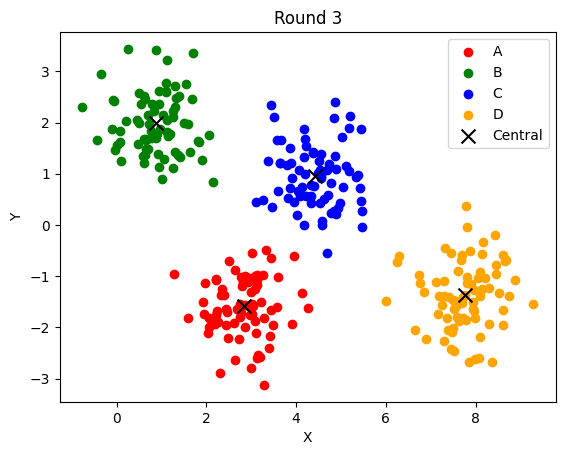

In [7]:
centroids, clusters = Kmeans_algo(4, data, True)

QUESTION 2

In [8]:
# Funcion used for calc. Sum of Squared Error
def calc_SSE(data, centroids, clusters):
    sse = 0
    for i in range(len(centroids)):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            sse += np.sum((points_in_cluster[:, :2] - centroids[i]) ** 2)  # Sum of squared distances
    return sse

# Function used for plotting the graph
def run_kmeans_for_sse(data, max_k, min_k):
    sse_values = []
    K_values = list(range(min_k, max_k + 1))
    
    # Loop over different values of K and store the data for plotting the graph later
    for K in K_values:
        centroids, clusters = Kmeans_algo(K, data, draw_round=False)  
        sse = calc_SSE(data, centroids, clusters)
        sse_values.append(sse)
        #print(f"K = {K}, SSE = {sse}")
    
    # Plot the graph
    plt.figure()
    plt.plot(K_values, sse_values)
    plt.xlabel("Number of k")
    plt.ylabel("Sum of Squared Error")
    plt.title("K value (x-axis) vs. the value of Sum of Squared Error (SSE) (y-axis)")
    plt.show()

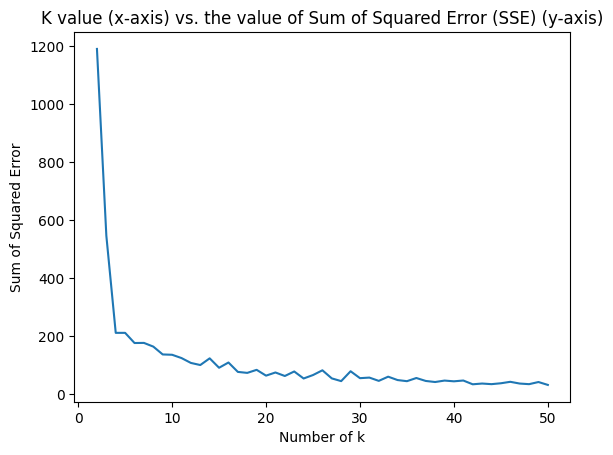

In [88]:
run_kmeans_for_sse(data, 50, 2) 

QUESTION 3

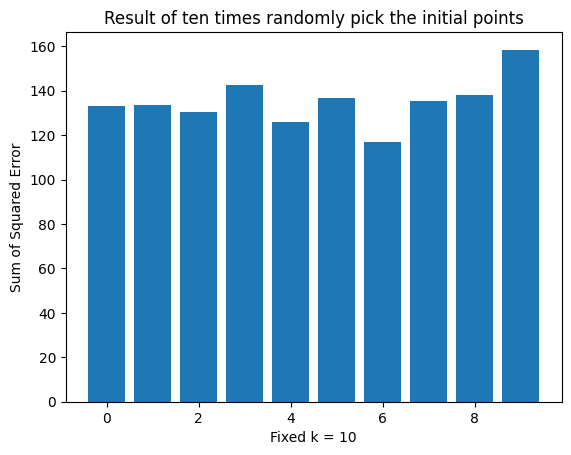

In [9]:
# Fixed K
K = 10
sse_values = [] # Use to store those 10 calculated datas
# Run the algorithm 10 times
for i in range(10):
    centroids, clusters = Kmeans_algo(K, data, False)
    # Calc. SSE and store the result
    sse = calc_SSE(data, centroids, clusters)
    sse_values.append(sse)

# Plot the bar graph
plt.figure()
plt.bar(range(10), sse_values)
plt.xlabel("Fixed k = 10")
plt.ylabel("Sum of Squared Error")
plt.title("Result of ten times randomly pick the initial points")
plt.show()